Arindita Prihastama | 1494037162100-370 | arinditap@gmail.com

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/arinditap/dicoding-MachineLearning/main/cyberbullying_tweets.csv'
df = pd.read_csv(url)
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
category = pd.get_dummies(df.cyberbullying_type)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='cyberbullying_type')
df_baru

,tweet_text,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
0,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
4,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",0,1,0,0,0,0
47688,Turner did not withhold his disappointment. Tu...,0,1,0,0,0,0
47689,I swear to God. This dumb nigger bitch. I have...,0,1,0,0,0,0
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,0,1,0,0,0,0


In [ ]:
tweet = df_baru['tweet_text'].values
jenis = df_baru[['age', 'ethnicity', 'gender', 'not_cyberbullying', 'other_cyberbullying', 'religion']]

In [ ]:
from sklearn.model_selection import train_test_split
tweet_latih, tweet_uji, jenis_latih, jenis_uji = train_test_split(tweet, jenis, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='(?)')
tokenizer.fit_on_texts(tweet_latih)
tokenizer.fit_on_texts(tweet_uji)

sekuens_latih = tokenizer.texts_to_sequences(tweet_latih)
sekuens_uji = tokenizer.texts_to_sequences(tweet_uji)

padded_latih = pad_sequences(sekuens_latih)
padded_uji = pad_sequences(sekuens_uji)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=60000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
      print('Accuracy reached 83%, training stopped.')
      self.model.stop_training = True

callbacks=myCallback()

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, 
                    jenis_latih, 
                    epochs=num_epochs,
                    validation_data=(padded_uji, jenis_uji), 
                    verbose=2,
                    callbacks=[callbacks]
                    )

Epoch 1/30
1193/1193 - 39s - loss: 0.7677 - accuracy: 0.6698 - val_loss: 0.5254 - val_accuracy: 0.7769 - 39s/epoch - 32ms/step
Epoch 2/30
1193/1193 - 38s - loss: 0.4861 - accuracy: 0.7825 - val_loss: 0.4576 - val_accuracy: 0.7880 - 38s/epoch - 32ms/step
Epoch 3/30
1193/1193 - 36s - loss: 0.4355 - accuracy: 0.7988 - val_loss: 0.4659 - val_accuracy: 0.8065 - 36s/epoch - 30ms/step
Epoch 4/30
1193/1193 - 36s - loss: 0.3982 - accuracy: 0.8203 - val_loss: 0.4633 - val_accuracy: 0.8214 - 36s/epoch - 30ms/step
Epoch 5/30
1193/1193 - 36s - loss: 0.3676 - accuracy: 0.8437 - val_loss: 0.4517 - val_accuracy: 0.8247 - 36s/epoch - 30ms/step
Epoch 6/30
1193/1193 - 36s - loss: 0.3426 - accuracy: 0.8587 - val_loss: 0.4604 - val_accuracy: 0.8271 - 36s/epoch - 30ms/step
Epoch 7/30
1193/1193 - 36s - loss: 0.3237 - accuracy: 0.8723 - val_loss: 0.4867 - val_accuracy: 0.8288 - 36s/epoch - 30ms/step
Epoch 8/30
1193/1193 - 36s - loss: 0.2989 - accuracy: 0.8811 - val_loss: 0.5175 - val_accuracy: 0.8316 - 36s/ep

In [ ]:
import matplotlib.pyplot as plt

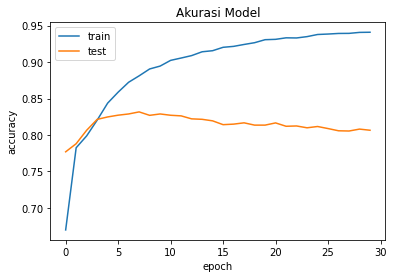

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

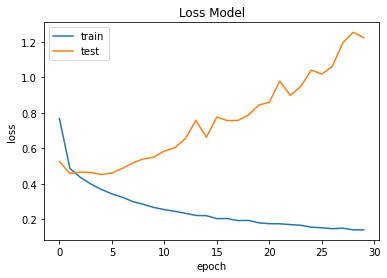

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()